In [6]:
import numpy as np
import MDAnalysis as md
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from bvvmmm.core import SineBVvMMM
from bvvmmm.utils import component_scan, fit_with_attempts

# Load Trajectory Using MDAnalysis

In [3]:
coord = md.Universe("diala_vacuum.parm7","adp_vac_md.dcd")
print("Number of frames:", coord.trajectory.n_frames)
# select protein
protein = coord.select_atoms("protein")
# Calculate phi and psi angles for each residue
# selection of atomgroups
phi_sel = [coord.residues[1].phi_selection()]
psi_sel = [coord.residues[1].psi_selection()]

from MDAnalysis.analysis.dihedrals import Dihedral
phi = Dihedral(phi_sel).run()
psi = Dihedral(psi_sel).run()

# format data for MultiSineBVVMMM
phi_psi = np.column_stack((phi.results.angles,psi.results.angles))

Number of frames: 285715


## Convert to Radians and print size for reference

In [4]:
print(phi_psi.shape)
phi_psi = np.radians(phi_psi)

(285715, 2)


## Do a single bivariate von Mises Mixture Model (BVvMMM) fit

Here we will assume 3 components and do a single fit for instructional purposes.  It is recommended to deteremine number of components using a component scan (see below) and do multiple attempts for each fit (also shown below).

0 -3.334023699488768 [0.40993463 0.17361629 0.41644908]
1 -1.5152897264781577 [0.47462546 0.14128949 0.38408505]
2 -1.0649157834805285 [0.65087762 0.08299058 0.2661318 ]
3 -0.7829217840509721 [0.71897972 0.05623459 0.22478568]
4 -0.7248089565720304 [0.7316256  0.04067684 0.22769756]
5 -0.693487767100817 [0.73420796 0.02824944 0.2375426 ]
6 -0.6634440810756008 [0.73435452 0.02329368 0.2423518 ]
7 -0.6475465984228033 [0.73356267 0.02110321 0.24533412]
8 -0.6394081569814303 [0.73197663 0.01991108 0.24811229]
9 -0.6272687554474872 [0.73023328 0.0198201  0.24994662]
10 -0.627293044578796 [0.72882016 0.01979034 0.2513895 ]


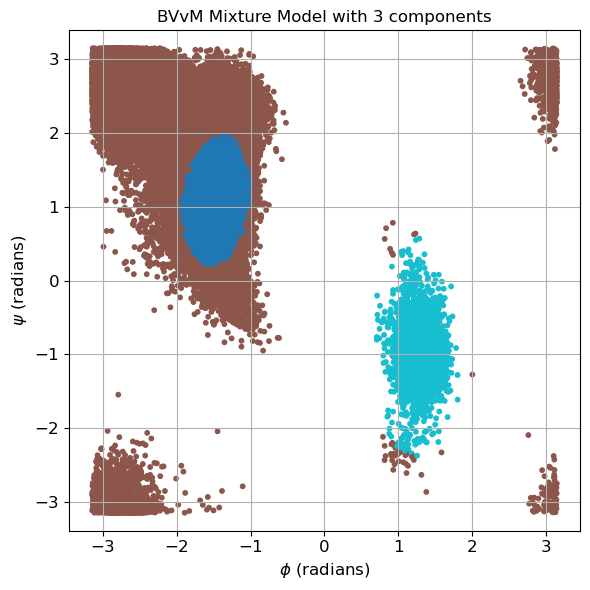

In [12]:
adp_3_component_model = SineBVvMMM(n_components=3,verbose=True)
adp_3_component_model.fit(phi_psi)
adp_3_component_model.plot_scatter_clusters(phi_psi)

# Component Scan to determine number of components

In [7]:
components = np.arange(1,8,1)
ll, aic, bic, icl, cv_ll, best_models = component_scan(phi_psi, components, n_attempts=12, train_frac=0.9)

Training on 257143 samples and validating on 28572 samples.
Components: 1, Attempt: 1, Training LL: -1.666573709668437, CV LL: -1.6640887512215108
Components: 2, Attempt: 1, Training LL: -0.7843137642288336, CV LL: -0.7878515988951535
Components: 2, Attempt: 2, Training LL: -0.7843062276883915, CV LL: -0.7878478239707278
Components: 2, Attempt: 3, Training LL: -0.7843403949333497, CV LL: -0.787865955341619
Components: 2, Attempt: 4, Training LL: -0.7843538760585097, CV LL: -0.7878731006536533
Components: 2, Attempt: 5, Training LL: -0.7842940652884322, CV LL: -0.7878414140486617
Components: 2, Attempt: 6, Training LL: -0.7843155710256916, CV LL: -0.7878528082885439
Components: 2, Attempt: 7, Training LL: -0.7843262014809936, CV LL: -0.7878584365545827
Components: 2, Attempt: 8, Training LL: -0.7842912506320727, CV LL: -0.7878391487575166
Components: 2, Attempt: 9, Training LL: -0.7843539233664383, CV LL: -0.7878731151828408
Components: 2, Attempt: 10, Training LL: -0.7842912607927155, 

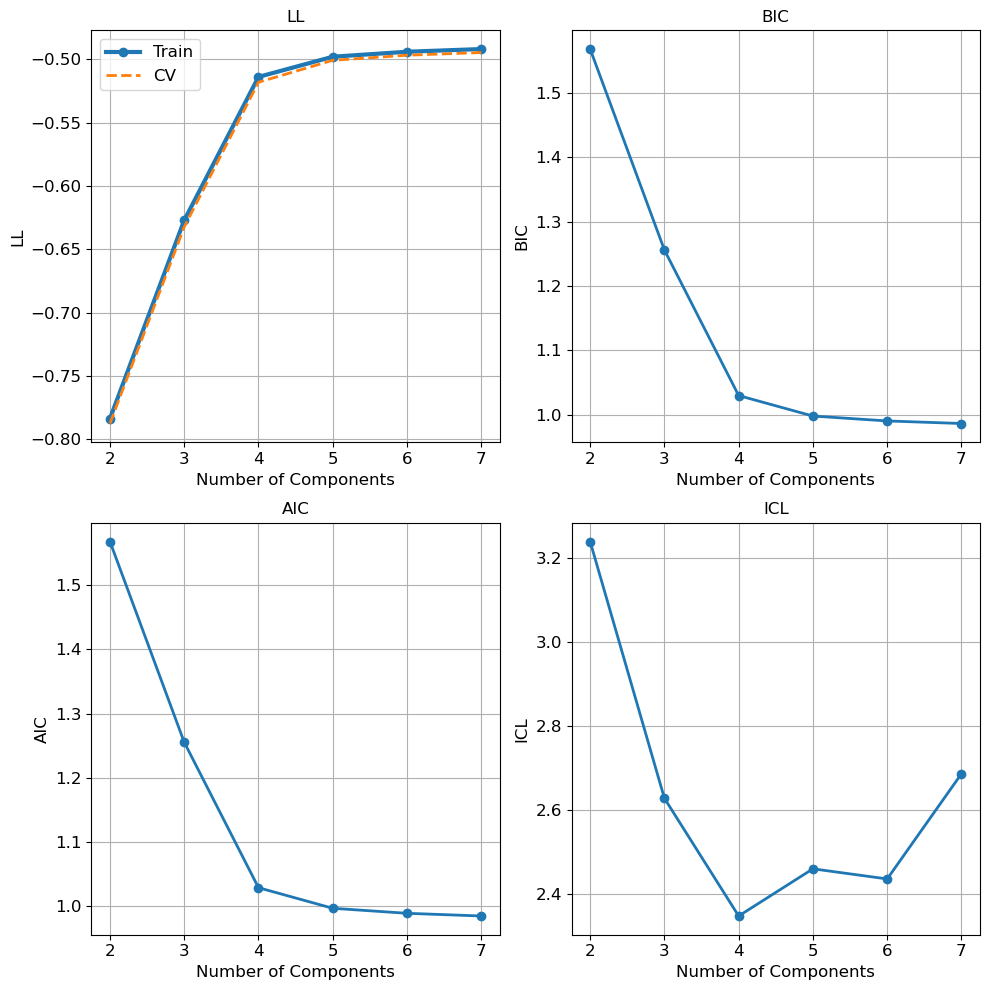

In [8]:
# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # 2 row, 2 columns
fontsize=12
# LL
axes[0,0].plot(components[1:], ll[1:], '-o', lw=3, label="Train")
axes[0,0].plot(components[1:], cv_ll[1:], '--', lw=2, label="CV")
axes[0,0].set_title('LL', fontsize=fontsize)
axes[0,0].set_xlabel('Number of Components',fontsize=fontsize)
axes[0,0].set_ylabel('LL',fontsize=fontsize)
axes[0,0].grid(True)
axes[0,0].tick_params(axis='both', labelsize=fontsize)
axes[0,0].legend(fontsize=fontsize)

# BIC
axes[0,1].plot(components[1:], bic[1:], '-o', lw=2)
axes[0,1].set_title('BIC',fontsize=fontsize)
axes[0,1].set_xlabel('Number of Components',fontsize=fontsize)
axes[0,1].set_ylabel('BIC',fontsize=fontsize)
axes[0,1].grid(True)
axes[0,1].tick_params(axis='both', labelsize=fontsize)

# AIC
axes[1,0].plot(components[1:], aic[1:], '-o', lw=2)
axes[1,0].set_title('AIC',fontsize=fontsize)
axes[1,0].set_xlabel('Number of Components',fontsize=fontsize)
axes[1,0].set_ylabel('AIC',fontsize=fontsize)
axes[1,0].grid(True)
axes[1,0].tick_params(axis='both', labelsize=fontsize)

# ICL
axes[1,1].plot(components[1:], icl[1:], '-o', lw=2)
axes[1,1].set_title('ICL',fontsize=fontsize)
axes[1,1].set_xlabel('Number of Components',fontsize=fontsize)
axes[1,1].set_ylabel('ICL',fontsize=fontsize)
axes[1,1].grid(True)
axes[1,1].tick_params(axis='both', labelsize=fontsize)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show();

# Fit 4 Component Model with Multiple Attempts

 Attempt |  Log-Likelihood
----------------------------
       1 |       -0.559329
       2 |       -0.556642
       3 |       -0.598776
       4 |       -0.599314
       5 |       -0.559337
       6 |       -0.559331
       7 |       -0.514096
       8 |       -0.558832
       9 |       -0.514091
      10 |       -0.514111
      11 |       -0.599406
      12 |       -0.599318
      13 |       -0.599313
      14 |       -0.556946
      15 |       -0.549246


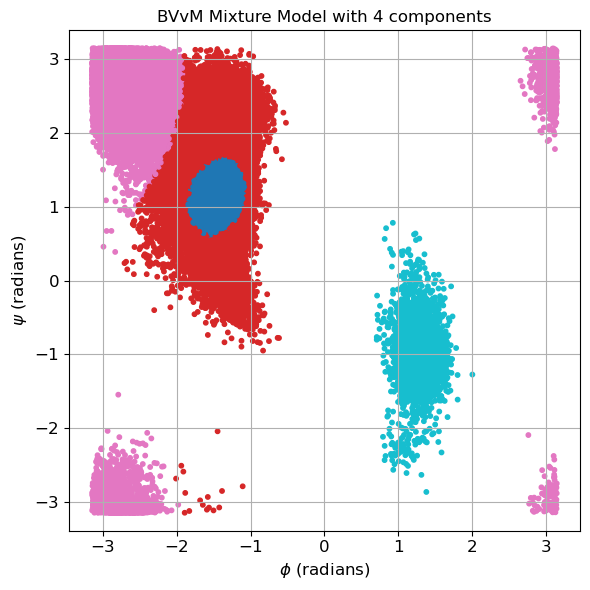

In [9]:
adp_4components = fit_with_attempts(phi_psi, 4, 15)
adp_4components.plot_scatter_clusters(phi_psi)

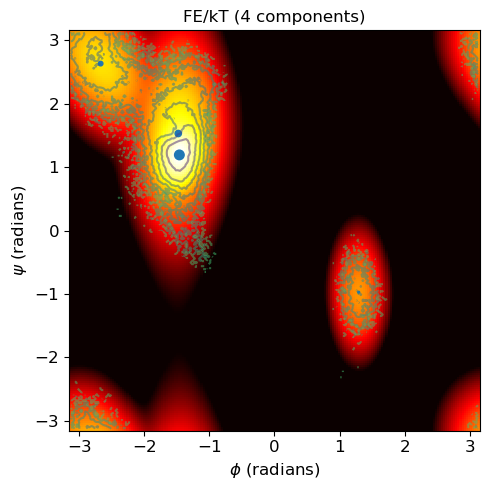

In [10]:
adp_4components.plot_model_sample_fe(phi_psi)